In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [2]:
oecd_bli = pd.read_csv("D:\projects\OECD_data.csv", thousands=',')

In [3]:
gdp_per_capita = pd.read_csv("D:\projects\GDP_per_capita.csv")

In [11]:
#Join data
country_stats = pd.merge(oecd_bli,gdp_per_capita,left_on='Country',right_on='Country Name',how='inner')
country_stats.rename(columns={"2019": "GDP per Capita", "Value": "Life Satisfaction"}, inplace=True)
country_stats[["Country","GDP per Capita","Life Satisfaction"]].head(30)

,Country,GDP per Capita,Life Satisfaction
0,Australia,55057.204696,7.3
1,Austria,50121.554213,7.1
2,Belgium,46414.435233,6.9
3,Canada,46326.672638,7.4
4,Czech Republic,23660.148807,6.7
5,Denmark,59775.735096,7.6
6,Finland,48678.314132,7.6
7,France,40578.644285,6.5
8,Germany,46794.899292,7.0
9,Greece,19150.786196,5.4


In [5]:
#put the data into numpy arrays
X = np.c_[country_stats["GDP per Capita"]]
y = np.c_[country_stats["Life Satisfaction"]]

<AxesSubplot:xlabel='GDP per Capita', ylabel='Life Satisfaction'>

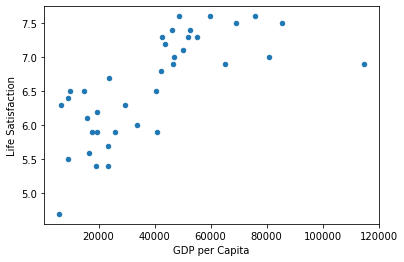

In [6]:
country_stats.plot(kind='scatter', x="GDP per Capita", y='Life Satisfaction')

## Linear Regression

In [7]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression()

In [8]:
X_new = [[28288]]  # Cyprus' GDP per capita
print("Estimated Life Happiness from Regression:", model.predict(X_new))

Estimated Life Happiness from Regression: [[6.34271805]]


## Nearest Neighbor(n=3)
##### closest neighbor to Cyprus ends up being Spain at GDP per capita: 29555 and Life Happiness:	6.3

In [9]:
nn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
nn_model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [10]:
print("Estimated Life Happiness from Nearest Neighbor(n=3):", nn_model.predict(X_new))

Estimated Life Happiness from Nearest Neighbor(n=3): [[6.3]]
